In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
from tensorflow import keras
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame
from scipy.signal import savgol_filter

In [179]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
data_x = FLT_1.iloc[:,0:7]
data_y = FLT_1.iloc[:,7:10]

y1 = data_y['Cd'].to_numpy()
y2 = data_y['Cl'].to_numpy()
y3 = data_y['Cm'].to_numpy()

y1 = savgol_filter(y1,window_length=8000, polyorder=4)
y2 = savgol_filter(y2,window_length=8000, polyorder=4)
y3 = savgol_filter(y3,window_length=8000, polyorder=4)

data_y = {'Cd':y1,
          'Cl':y2,
          'Cm':y3}

data_y = pd.DataFrame(data_y)



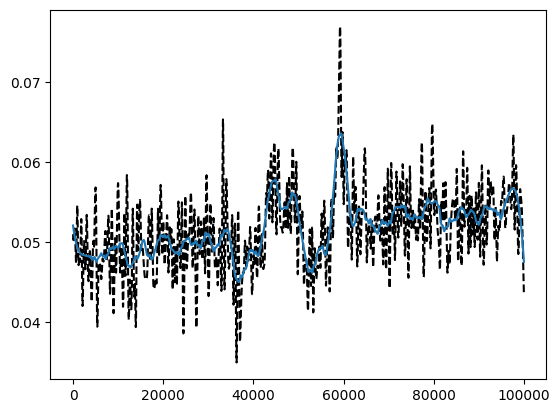

In [180]:
plt.plot(FLT_1['Cd'], 'k--')
plt.plot(data_y['Cd'])

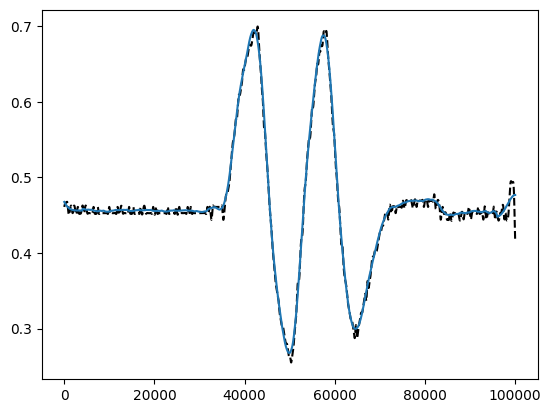

In [181]:
plt.plot(FLT_1['Cl'], 'k--')
plt.plot(data_y['Cl'])


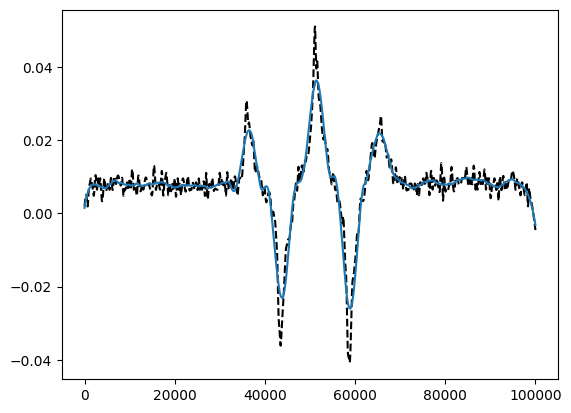

In [183]:
plt.plot(FLT_1['Cm'], 'k--')
plt.plot(data_y['Cm'])


In [184]:
x = data_x[0:(len(data_x)-1)]
y = data_y[1:(len(data_y))]


from sklearn.model_selection import train_test_split
x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

x_test = DataFrame.sort_index(x_test, ignore_index= True)
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True)
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True)
y_training = DataFrame.sort_index(y_training, ignore_index= True)

x_test = x_test[0:len(x_test)].to_numpy()
y_test = y_test[0:len(y_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()


(10000, 7)
(10000, 3)
(10000, 7)
(10000, 3)
(79999, 7)
(79999, 3)


In [185]:

model = keras.Sequential([
    keras.layers.Dense(7 , input_shape= (7,)),
    keras.layers.Dense(8 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0218 - root_mean_squared_error: 0.1478 - val_loss: 2.9562e-04 - val_root_mean_squared_error: 0.0172
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 1.6696e-04 - root_mean_squared_error: 0.0129 - val_loss: 9.9099e-05 - val_root_mean_squared_error: 0.0100
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 8.2110e-05 - root_mean_squared_error: 0.0091 - val_loss: 6.8545e-05 - val_root_mean_squared_error: 0.0083
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 6.4973e-05 - root_mean_squared_error: 0.0081 - val_loss: 5.8964e-05 - val_root_mean_squared_error: 0.0077
Epoch 5/1000
800/800 [==============================] - 1s 2ms/step - loss: 5.5609e-05 - root_mean_squared_error: 0.0075 - val_loss: 4.9701e-05 - val_root_mean_squared_error: 0.0070
Epoch 6/1000
800/800 [==============================] - 1s 2ms/step - loss: 4.9039e-05 - root_

In [186]:
model_2 = keras.Sequential([
    keras.layers.Dense(7 , input_shape= (7,)),
    keras.layers.Dense(8 ,activation = "tanh"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model_2.summary()



Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0344
Epoch 5/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 7.8248e-04 - val_root_mean_squared_error: 0.0280
Epoch 6/1000
800/800 [==============================] - 1s 2ms/step - loss: 5.8984e-04 - root_mean_squared_error: 0.0243 - val

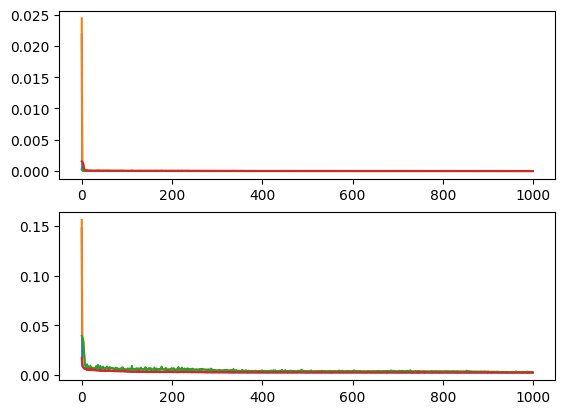

In [187]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'])
ax[0].plot(history_2.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].plot(history_2.history['val_loss'])

ax[1].plot(history.history['root_mean_squared_error'])
ax[1].plot(history_2.history['root_mean_squared_error'])

ax[1].plot(history_2.history['val_root_mean_squared_error'])
ax[1].plot(history.history['val_root_mean_squared_error'])



In [192]:
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [193]:
FLT_1_Sigmoid = DataFrame(y_pred, columns=['Cd','Cl','Cm'])

In [194]:
FLT_1_Tanh = DataFrame(y_pred_2, columns=['Cd','Cl','Cm'])

R-square sigmoid: 0.8539207279592865
R-square tanh: 0.8493262761714188


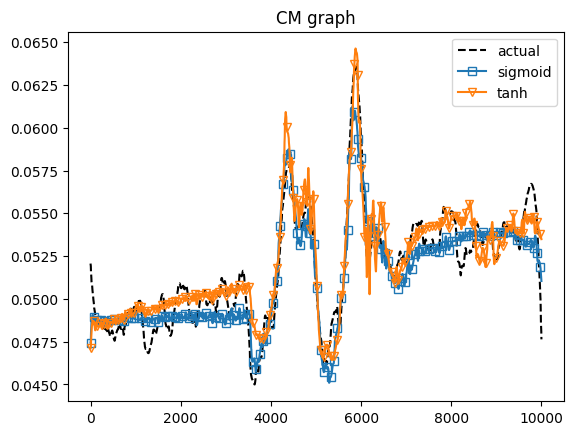

In [240]:
plt.title('CM graph')
plt.plot(y_test[:,0], 'k--', label = 'actual')
plt.plot(y_pred[:,0], marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
plt.plot(y_pred_2[:,0], marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
print('R-square sigmoid:',r2_score(y_test[:,0], y_pred[:,0]))
print('R-square tanh:',r2_score(y_test[:,0], y_pred_2[:,0]))
plt.legend()


R-square sigmoid: 0.9983788692228432
R-square tanh: 0.9980256555492724


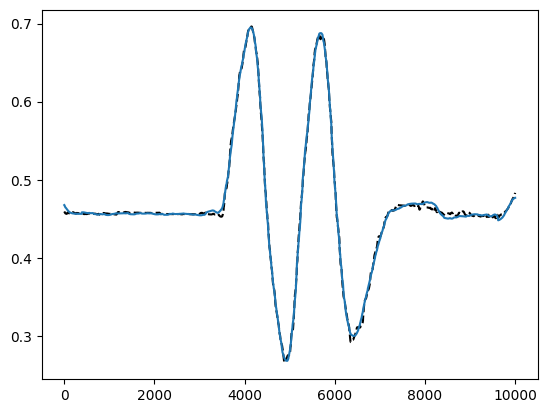

In [200]:
plt.plot(y_pred[:,1], 'k--')
plt.plot(y_test[:,1])
print('R-square sigmoid:',r2_score(y_test[:,1], y_pred[:,1]))
print('R-square tanh:',r2_score(y_test[:,1], y_pred_2[:,1]))



R-square sigmoid: 0.9500252706896155
R-square tanh: 0.9258579003149255


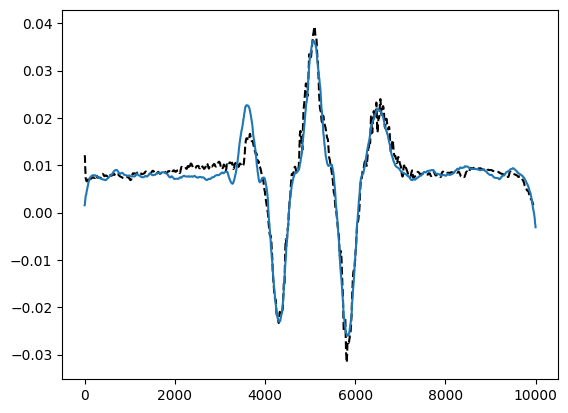

In [201]:
plt.plot(y_pred[:,2], 'k--')
plt.plot(y_test[:,2])
print('R-square sigmoid:',r2_score(y_test[:,2], y_pred[:,2]))
print('R-square tanh:',r2_score(y_test[:,2], y_pred_2[:,2]))


In [209]:
print ("Overall:")
print('R-square sigmoid:',r2_score(y_test, y_pred))
print('R-square tanh:',r2_score(y_test, y_pred_2))



Overall:
R-square sigmoid: 0.9341082892905819
R-square tanh: 0.9244032773452053
